In [1]:
import numpy as np
import matplotlib.pyplot as plt


#Active Ribosomes
x_rib = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
y_rib = np.array([8000,15000,26000,44000,61000,73000])
y_rib = np.array([int(y_i*0.85) for y_i in y_rib])

#Ternary complexes
x_tern = np.array([0.4,0.7,1.07,1.6,2.5,3.0]+[0.4]*5)
y_tern = np.array([48000,57000,83000,143000,323000,383000]+[48000]*5)

#Cell mass
x_mass = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
y_mass = np.array([159,257,370,512,607,636])

## Cell Volume
x_vol = np.array([0.25,0.42,0.56,0.58,0.68,0.71,0.87,1.81,1.85,2.15,2.3])
y_vol = np.array([1.14,1.44,1.74,1.26,1.11,1.38,1.44,2.15,2.34,2.46,2.4])

##Nucleoid volume
x_nuc = np.array([0.4,1.36,2.85])
y_nuc = np.array([0.17,0.13,0.11])


x_vals = np.array([x_rib, x_tern, x_mass, x_vol,x_nuc])
y_vals = np.array([y_rib, y_tern, y_mass, y_vol,y_nuc])
label_vals = np.array(["Ribosomes", "Ternary complexes", "Cell mass", "Cell volume","Nucleoid volume fraction"])

241
[0.99, 0.99, 0.99, 0.87, 0.9]


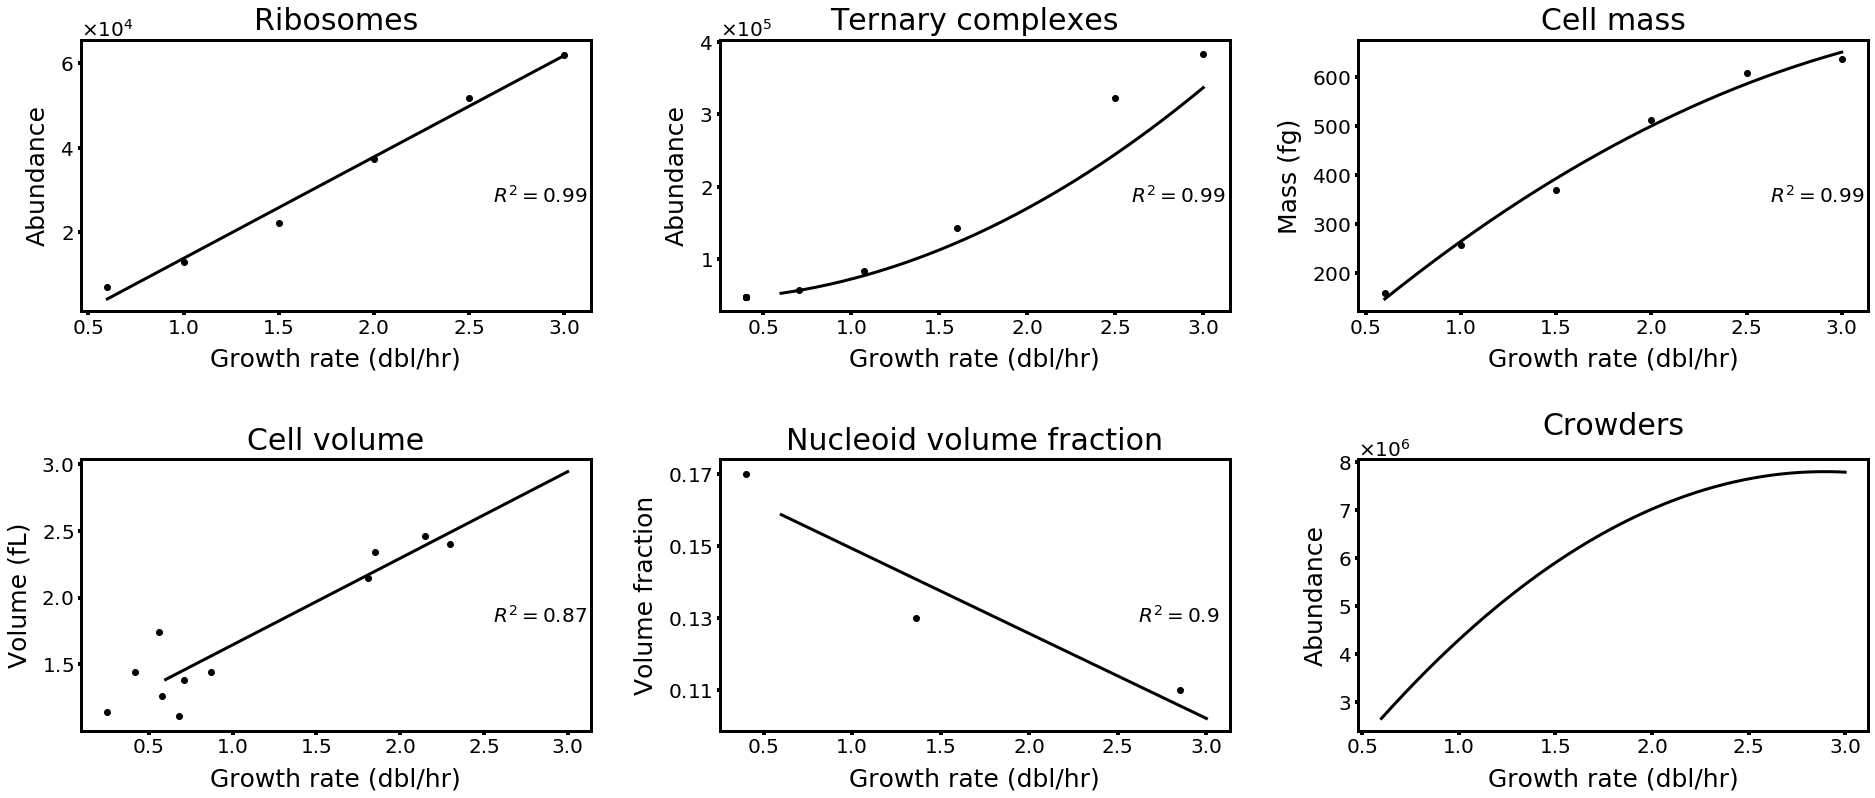

In [57]:
#Calculation of polynomial fits are in analysis_parameters.py
from analysis_parameters import *
from sympy import S, symbols, expand, Symbol
import sympy
import matplotlib.ticker as mticker

dbl_rate=np.arange(0.6,3.01,0.01)
def calc_R2(x,y,y_hat):
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    return 1-SS_err/SS_tot

dbl_rate_list = list()
for i in range(len(label_vals)):
    dbl_rate_list.append(np.arange(0.6,3.01,0.01))#min(x_vals[i]) instead of 0.6
print(len(dbl_rate))
crowderAbundance_psite = list()
tern_psite=list()
ribs_psite=list()
for i in range(len(dbl_rate)):
    cell_volfrac_tot = list()
    cellParams, voxelParams = calcParams(f_rib(dbl_rate[i]),
                                               f_tern(dbl_rate[i]),
                                               f_mass(dbl_rate[i]),
                                               f_vol(dbl_rate[i]),
                                               f_nuc(dbl_rate[i]),psite=True)
    crowderAbundance_psite.append(cellParams[2][2])
    tern_psite.append(cellParams[2][1])
    ribs_psite.append(cellParams[2][0])

mass = [f_mass(i) for i in dbl_rate_list[2]]
vol = [f_vol(i) for i in dbl_rate_list[3]]
nuc = [f_nuc(i) for i in dbl_rate_list[4]]

fig,ax = plt.subplots(2,3,figsize=(27,12))
ax = ax.flatten()
y_labels = ['Abundance','Abundance','Mass (fg)','Volume (fL)', 'Volume fraction','Abundance']
y_fits = [ribs,tern,mass,vol,nuc]
fits = [lambda x:f_rib(x),lambda x:f_tern(x),lambda x:f_mass(x),lambda x:f_vol(x), lambda x:f_nuc(x)]
R2_arr = list()

ax[0].set_yticks(np.arange(0, 8*10**4, 2*10**4))
ax[1].set_yticks(np.arange(0, 5*10**5, 1*10**5))
ax[4].set_yticks(np.arange(0.01, 0.2, 0.02))
for i in range(len(y_vals)):
    R2_arr.append(np.around(calc_R2(x_vals[i],y_vals[i],fits[i](x_vals[i])),2))
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,3))
    ax[i].yaxis.offsetText.set_fontsize(20)
    ax[i].yaxis.set_major_formatter(formatter)
    ax[i].plot(dbl_rate_list[i],y_fits[i],color='black',linewidth=3)
    ax[i].scatter(x_vals[i],y_vals[i],color='black')
    #ax[i].set(xlim=(min(x_vals[i]),max(x_vals[i])), ylim=[min(y_vals[i]), max(y_vals[i])])
    ax[i].set_title(label_vals[i],fontsize=30,pad=10)
    ax[i].text(0.9,0.4,r'$R^2=$'+str(R2_arr[-1]),horizontalalignment='center',transform=ax[i].transAxes,fontsize=20)

for i in range(len(y_vals)+1):
    ax[i].spines['left'].set_linewidth(3)
    ax[i].spines['bottom'].set_linewidth(3)
    ax[i].spines['top'].set_linewidth(3)
    ax[i].spines['right'].set_linewidth(3)
    ax[i].set_ylabel(y_labels[i],size=25,labelpad=10)
    ax[i].set_xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
    ax[i].tick_params(axis='both', which='major',width=4, labelsize=20)

ax[5].yaxis.set_major_formatter(formatter)
ax[5].yaxis.offsetText.set_fontsize(20)
ax[5].set_title('Crowders',fontsize=30,pad=25)
ax[5].plot(dbl_rate,crowderAbundance,color='black',linewidth=3)
plt.tight_layout(pad=4.0)
print(R2_arr)

241
[0.99, 0.99, 0.99, 0.87, 0.9]


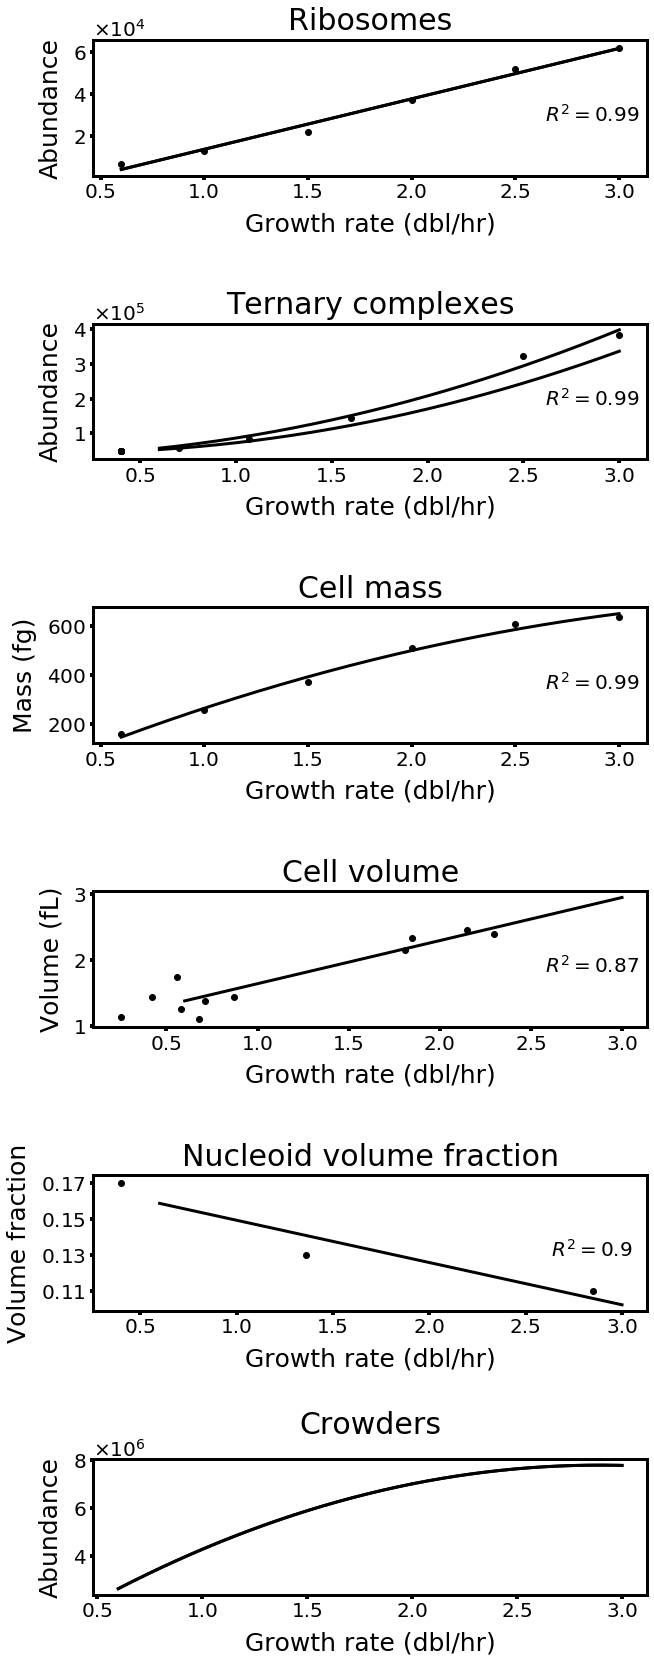

In [62]:
#Calculation of polynomial fits are in analysis_parameters.py
from analysis_parameters import *
from sympy import S, symbols, expand, Symbol
import sympy
import matplotlib.ticker as mticker

dbl_rate=np.arange(0.6,3.01,0.01)
def calc_R2(x,y,y_hat):
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    return 1-SS_err/SS_tot

dbl_rate_list = list()
for i in range(len(label_vals)):
    dbl_rate_list.append(np.arange(0.6,3.01,0.01))#min(x_vals[i]) instead of 0.6
print(len(dbl_rate))
crowderAbundance = list()
for i in range(len(dbl_rate)):
    cell_volfrac_tot = list()
    cellParams, voxelParams = calcParams(f_rib(dbl_rate[i]),
                                               f_tern(dbl_rate[i]),
                                               f_mass(dbl_rate[i]),
                                               f_vol(dbl_rate[i]),
                                               f_nuc(dbl_rate[i]))
    crowderAbundance.append(cellParams[2][2])
ribs = [f_rib(i) for i in dbl_rate_list[0]]
tern = [f_tern(i) for i in dbl_rate_list[1]]
mass = [f_mass(i) for i in dbl_rate_list[2]]
vol = [f_vol(i) for i in dbl_rate_list[3]]
nuc = [f_nuc(i) for i in dbl_rate_list[4]]

fig,ax = plt.subplots(6,1,figsize=(10,24))
ax = ax.flatten()
y_labels = ['Abundance','Abundance','Mass (fg)','Volume (fL)', 'Volume fraction','Abundance']
y_fits = [ribs,tern,mass,vol,nuc]
fits = [lambda x:f_rib(x),lambda x:f_tern(x),lambda x:f_mass(x),lambda x:f_vol(x), lambda x:f_nuc(x)]
R2_arr = list()

ax[0].set_yticks(np.arange(0, 8*10**4, 2*10**4))
ax[1].set_yticks(np.arange(0, 5*10**5, 1*10**5))
ax[4].set_yticks(np.arange(0.01, 0.2, 0.02))
for i in range(len(y_vals)):
    R2_arr.append(np.around(calc_R2(x_vals[i],y_vals[i],fits[i](x_vals[i])),2))
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,3))
    ax[i].yaxis.offsetText.set_fontsize(20)
    ax[i].yaxis.set_major_formatter(formatter)
    ax[i].plot(dbl_rate_list[i],y_fits[i],color='black',linewidth=3)
    ax[i].scatter(x_vals[i],y_vals[i],color='black')
    #ax[i].set(xlim=(min(x_vals[i]),max(x_vals[i])), ylim=[min(y_vals[i]), max(y_vals[i])])
    ax[i].set_title(label_vals[i],fontsize=30,pad=10)
    ax[i].text(0.9,0.4,r'$R^2=$'+str(R2_arr[-1]),horizontalalignment='center',transform=ax[i].transAxes,fontsize=20)

ax[0].plot(dbl_rate_list[0],ribs_psite,color='black',linewidth=3)
ax[1].plot(dbl_rate_list[0],tern_psite,color='black',linewidth=3)
ax[5].plot(dbl_rate_list[0],crowderAbundance_psite,color='black',linewidth=3)

for i in range(len(y_vals)+1):
    ax[i].spines['left'].set_linewidth(3)
    ax[i].spines['bottom'].set_linewidth(3)
    ax[i].spines['top'].set_linewidth(3)
    ax[i].spines['right'].set_linewidth(3)
    ax[i].set_ylabel(y_labels[i],size=25,labelpad=10)
    ax[i].set_xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
    ax[i].tick_params(axis='both', which='major',width=4, labelsize=20)

ax[5].yaxis.set_major_formatter(formatter)
ax[5].yaxis.offsetText.set_fontsize(20)
ax[5].set_title('Crowders',fontsize=30,pad=25)
ax[5].plot(dbl_rate,crowderAbundance,color='black',linewidth=3)
plt.tight_layout(pad=4.0)
print(R2_arr)

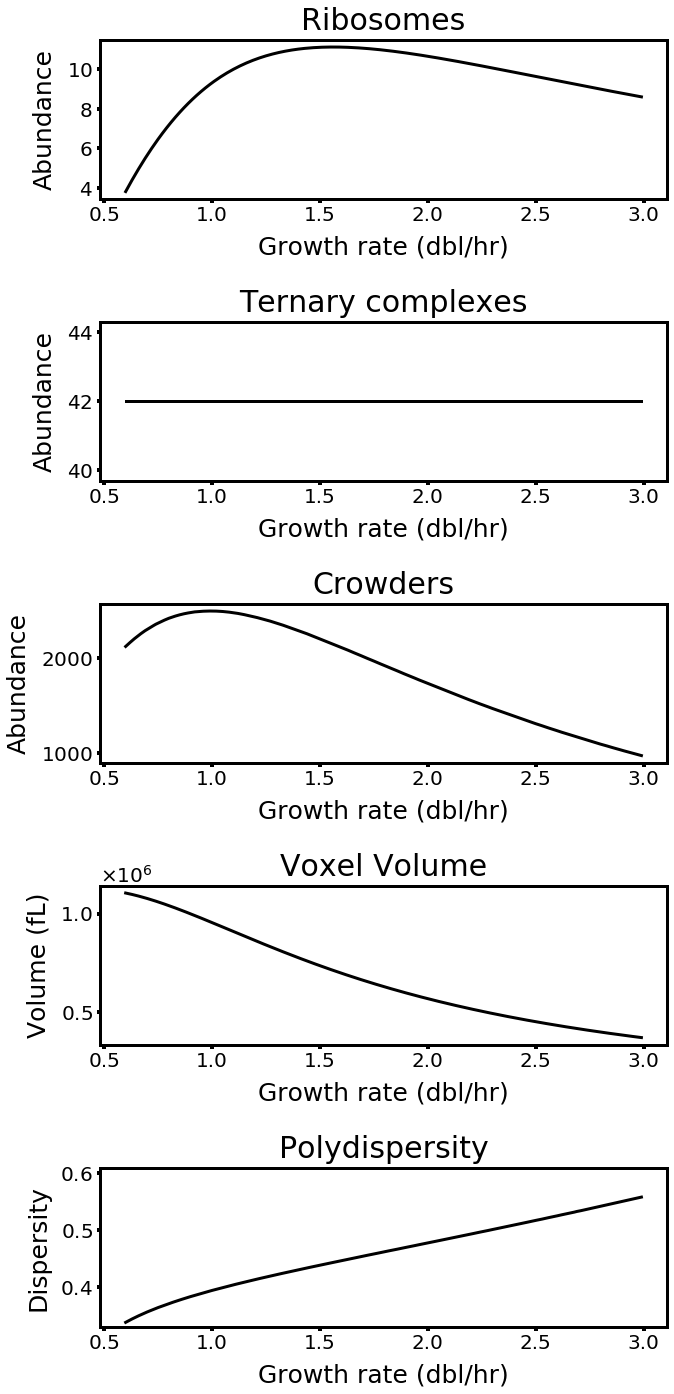

In [42]:
##P site modified
from sympy import S, symbols, expand, Symbol
import sympy
import matplotlib.ticker as mticker



dbl_rate=np.arange(0.6,3.0,0.01)
ribAbundance_vox_psite = list()
ternAbundance_vox_psite = list()
crowderAbundance_vox_psite = list()
dispersity_vox_psite = list()
size_vox_psite = list()

for i in range(len(dbl_rate)):
    cell_volfrac_tot_psite = list()
    cellParams_psite, voxelParams_psite = calcParams(f_rib(dbl_rate[i]),
                                               f_tern(dbl_rate[i]),
                                               f_mass(dbl_rate[i]),
                                               f_vol(dbl_rate[i]),
                                               f_nuc(dbl_rate[i]),psite=True)
    ribAbundance_vox_psite.append(voxelParams_psite[2][0])
    ternAbundance_vox_psite.append(voxelParams_psite[2][1])
    crowderAbundance_vox_psite.append(voxelParams_psite[2][2])
    dispersity_vox_psite.append(voxelParams_psite[1][4])
    size_vox_psite.append(voxelParams_psite[0])
fig,ax = plt.subplots(5,1,figsize=(10,20))
dispersity_psite = [0.12, 0.16, 0.20, 0.24, 0.28, 0.31]
abundances_psite = [ribAbundance_vox_psite,ternAbundance_vox_psite, crowderAbundance_vox_psite,(np.array(size_vox_psite)**3*10**9),dispersity_vox_psite]
labels_psite = ['Ribosomes','Ternary complexes', 'Crowders', 'Voxel Volume','Polydispersity']

for i,count in enumerate(abundances_psite):
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-4,4))
    ax[i].yaxis.set_major_formatter(formatter)
    ax[i].yaxis.offsetText.set_fontsize(20)
    ax[i].plot(dbl_rate,count,color='black',linewidth=3)
    ax[i].spines['left'].set_linewidth(3)
    ax[i].spines['bottom'].set_linewidth(3)
    ax[i].spines['top'].set_linewidth(3)
    ax[i].spines['right'].set_linewidth(3)
    ax[i].set_ylabel('Abundance',size=25,labelpad=10)
    ax[i].set_xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
    ax[i].tick_params(axis='both', which='major',width=4, labelsize=20)
    ax[i].set_title(labels_psite[i],fontsize=30,pad=10)

ax[4].set_ylabel('Dispersity',size=25,labelpad=10)
ax[3].set_ylabel('Volume (fL)',size=25,labelpad=10)

ax[0].set_yticks(np.arange(4, 10.1, 2))

ax[4].set_yticks(np.arange(0.3, 0.61, 0.1))
ax[4].set_ylim(0.33,0.61)
plt.tight_layout(pad=3.0)

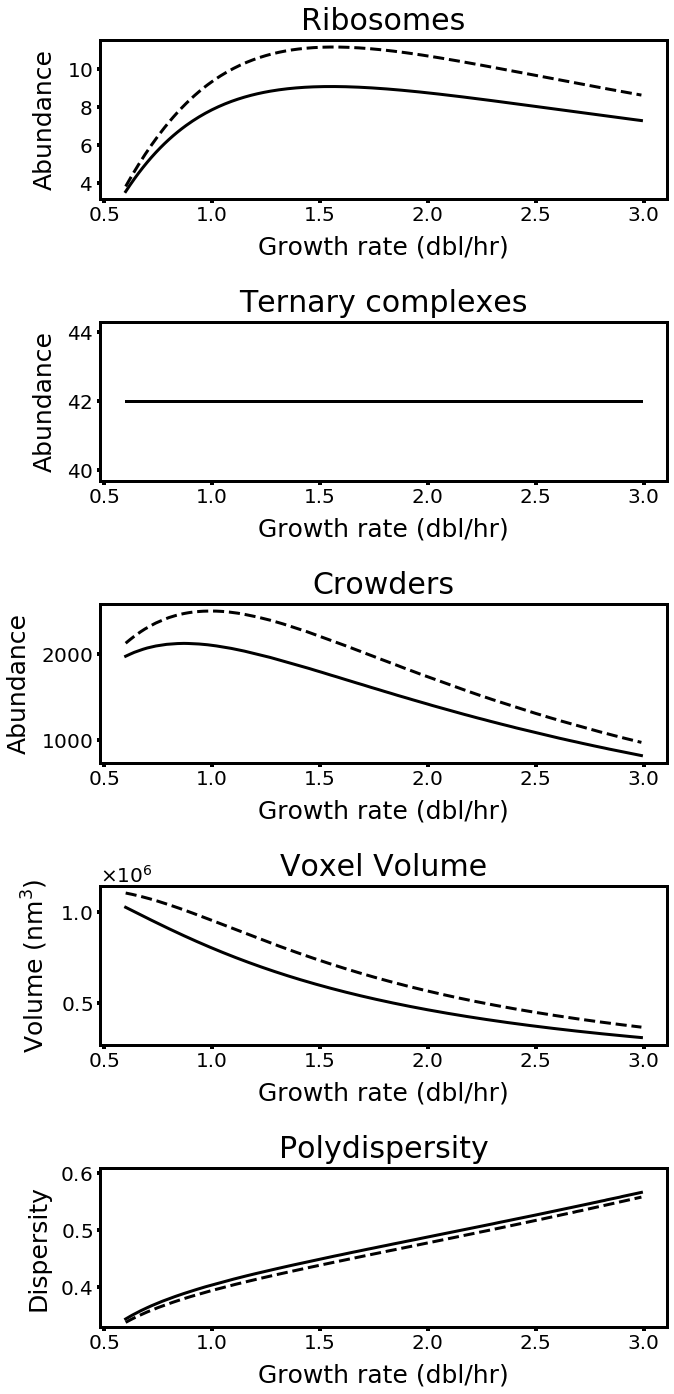

In [43]:
dbl_rate=np.arange(0.6,3.0,0.01)
ribAbundance_vox = list()
ternAbundance_vox = list()
crowderAbundance_vox = list()
dispersity_vox = list()
size_vox = list()

for i in range(len(dbl_rate)):
    cell_volfrac_tot = list()
    cellParams, voxelParams = calcParams(f_rib(dbl_rate[i]),
                                               f_tern(dbl_rate[i]),
                                               f_mass(dbl_rate[i]),
                                               f_vol(dbl_rate[i]),
                                               f_nuc(dbl_rate[i]))
    ribAbundance_vox.append(voxelParams[2][0])
    ternAbundance_vox.append(voxelParams[2][1])
    crowderAbundance_vox.append(voxelParams[2][2])
    dispersity_vox.append(voxelParams[1][4])
    size_vox.append(voxelParams[0])
fig,ax = plt.subplots(5,1,figsize=(10,20))
dispersity = [0.12, 0.16, 0.20, 0.24, 0.28, 0.31]

abundances = [ribAbundance_vox,ternAbundance_vox, crowderAbundance_vox,(np.array(size_vox)**3*10**9),dispersity_vox]
labels = ['Ribosomes','Ternary complexes', 'Crowders', 'Voxel Volume','Polydispersity']

for i,count in enumerate(abundances):
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter._formatSciNotation('%2f')
    formatter.set_powerlimits((-4,4))
    ax[i].yaxis.set_major_formatter(formatter)
    ax[i].yaxis.offsetText.set_fontsize(20)

    ax[i].plot(dbl_rate,abundances[i],color='black',linewidth=3)
    ax[i].plot(dbl_rate,abundances_psite[i],color='black',linewidth=3,linestyle='dashed')
    ax[i].spines['left'].set_linewidth(3)
    ax[i].spines['bottom'].set_linewidth(3)
    ax[i].spines['top'].set_linewidth(3)
    ax[i].spines['right'].set_linewidth(3)
    ax[i].set_ylabel('Abundance',size=25,labelpad=10)
    ax[i].set_xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
    ax[i].tick_params(axis='both', which='major',width=4, labelsize=20)
    ax[i].set_title(labels[i],fontsize=30,pad=10)
ax[4].set_ylabel('Dispersity',size=25,labelpad=10)
ax[3].set_ylabel('Volume ($\mathrm{nm}^3$)',size=25,labelpad=10)

ax[0].set_yticks(np.arange(4, 10.1, 2))

#ax[3].set_ylim(0.05,0.12)
ax[4].set_yticks(np.arange(0.3, 0.61, 0.1))
ax[4].set_ylim(0.33,0.61)
plt.tight_layout(pad=3.0)

In [47]:
print(crowderAbundance_vox[0])
print(crowderAbundance_vox_psite[0])
print(crowderAbundance_vox[40])
print(crowderAbundance_vox_psite[40])

1970.0
2120.0
2096.0
2491.0


In [48]:
2120/1970

1.0761421319796953

In [49]:
0.1*(18+)

1.1884541984732824

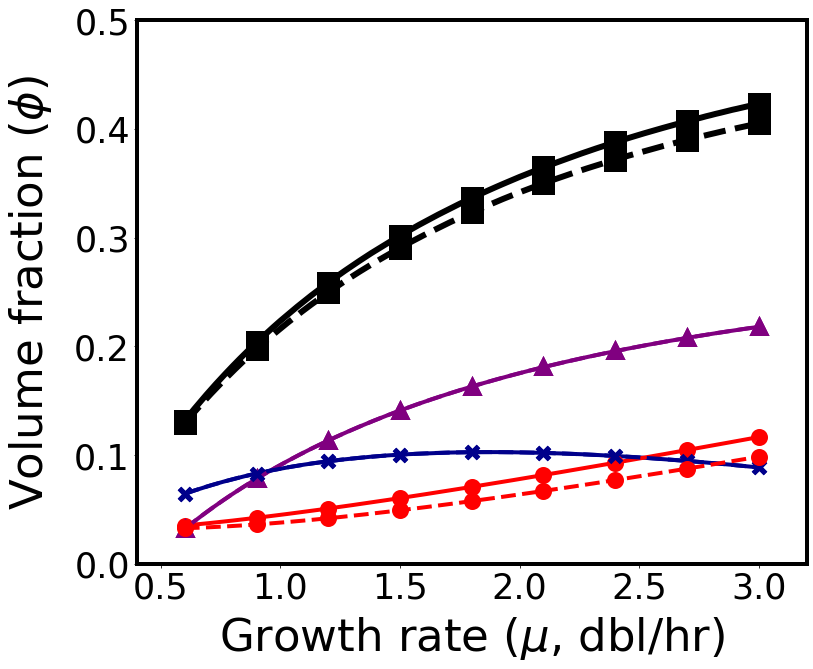

In [71]:
dbl_rate=np.arange(0.6,3.01,0.01)
vox_len = list()
rib_volfrac=list()
tern_volfrac = list()
crowder_volfrac = list()
total_volfrac =list()

vox_len_psite = list()
rib_volfrac_psite=list()
tern_volfrac_psite = list()
crowder_volfrac_psite = list()
total_volfrac_psite =list()
for i in range(len(dbl_rate)):
    cell_volfrac_tot = list()
    cellParams, voxelParams = calcParams(f_rib(dbl_rate[i]),
                                               f_tern(dbl_rate[i]),
                                               f_mass(dbl_rate[i]),
                                               f_vol(dbl_rate[i]),
                                               f_nuc(dbl_rate[i]))
    cellParams_psite, voxelParams_psite = calcParams(f_rib(dbl_rate[i]),
                                           f_tern(dbl_rate[i]),
                                           f_mass(dbl_rate[i]),
                                           f_vol(dbl_rate[i]),
                                           f_nuc(dbl_rate[i]),psite=True)
    vox_len.append(voxelParams[0])
    rib_volfrac.append(voxelParams[1][0])
    tern_volfrac.append(voxelParams[1][1])
    crowder_volfrac.append(voxelParams[1][2])
    total_volfrac.append(voxelParams[1][3])
    
    vox_len_psite.append(voxelParams_psite[0])
    rib_volfrac_psite.append(voxelParams_psite[1][0])
    tern_volfrac_psite.append(voxelParams_psite[1][1])
    crowder_volfrac_psite.append(voxelParams_psite[1][2])
    total_volfrac_psite.append(voxelParams_psite[1][3])
    
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(12,10))

ax1.plot(dbl_rate,total_volfrac,label=r'$\mathregular{\phi_{ voxel}}$',color='black',marker='s',markersize=18,markeredgewidth=5,linewidth=6,markevery=30)
ax1.plot(dbl_rate,rib_volfrac,label=r'$\mathregular{\phi_{ ribosome}}$',color='purple',marker='^',markersize=12,markeredgewidth=5,linewidth=4,markevery=30)
ax1.plot(dbl_rate,crowder_volfrac,label=r'$\mathregular{\phi_{ protein}}$',color='darkblue',marker='x',markersize=12,markeredgewidth=5,linewidth=4,markevery=30)
ax1.plot(dbl_rate,tern_volfrac,label=r'$\mathregular{\phi_{ tRNA}}$',color='red',marker='o',markersize=12,markeredgewidth=5,linewidth=4,markevery=30)


ax1.plot(dbl_rate,total_volfrac_psite,label=r'$\mathregular{\phi_{ voxel}}$',color='black',marker='s',markersize=18,markeredgewidth=5,linewidth=6,markevery=30,linestyle='dashed')
ax1.plot(dbl_rate,rib_volfrac_psite,label=r'$\mathregular{\phi_{ ribosome}}$',color='purple',marker='^',markersize=12,markeredgewidth=5,linewidth=4,markevery=30,linestyle='dashed')
ax1.plot(dbl_rate,crowder_volfrac_psite,label=r'$\mathregular{\phi_{ protein}}$',color='darkblue',marker='x',markersize=12,markeredgewidth=5,linewidth=4,markevery=30,linestyle='dashed')
ax1.plot(dbl_rate,tern_volfrac_psite,label=r'$\mathregular{\phi_{ tRNA}}$',color='red',marker='o',markersize=12,markeredgewidth=5,linewidth=4,markevery=30,linestyle='dashed')


#ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.1),ncol=1,prop={'size':20})
#ax1.legend(prop={'size':25})
ax1.set_xlabel("Growth rate ($\mu$, dbl/hr)",fontsize=45,labelpad=10)
ax1.set_ylabel("Volume fraction ($\phi$)",fontsize=45,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=35)
ax1.set_xlim(0.40,3.2)

ax1.set_ylim(0,0.5)
ax1.spines['right'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)
ax1.spines['top'].set_linewidth(4)
ax1.spines['bottom'].set_linewidth(4)


#print('Total voxel volume fraction: ', total_volfrac[40:301])
#print('\nRibosome volume fraction: ',rib_volfrac[40:301])
#print('\nCrowder volume fraction: ',crowder_volfrac[40:301])
#print('\nTernary complex volume fraction',tern_volfrac[40:301])